# Default prediction

The goal of this notebook is to predict cases of default using loan-level data given by Lending Club. Details regarding the features are given in the cells below.

In [1]:
import csv
import pandas as pd
import numpy as np
import sklearn

### Loading the data

In [2]:
df = pd.read_csv("loan.csv")

C:\Users\Pratik\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Inspecting the data

In [3]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print (df.shape)
print (df.dtypes.unique())

(887379, 74)
[dtype('int64') dtype('float64') dtype('O')]


In [5]:
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835917 non-null object
emp_length                     842554 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status          

In [6]:
objects = list(df.select_dtypes(include=['object']).columns)
print (objects, len(objects))

['term', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'application_type', 'verification_status_joint'] 23


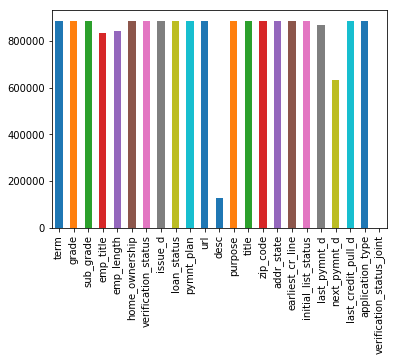

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
df[objects].count().plot.bar()

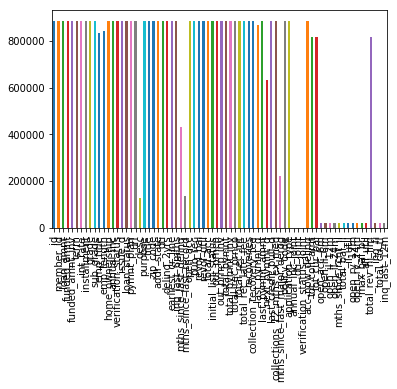

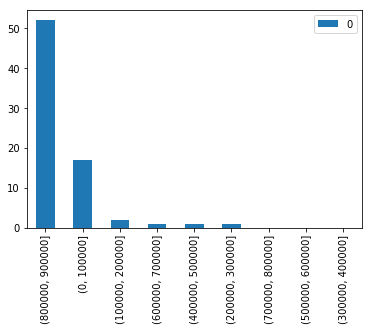

In [8]:
plt.figure()
df.count().plot.bar()
bins = np.arange(0,1000000, 100000)
hist = pd.cut(df.count(), bins).value_counts()
hist.to_frame().plot(kind='bar')

### Selecting attributes

In [9]:
selected = []
n = 800000
for col, count in zip(df.columns, df.count()):
    if count >= n:
        selected.append(col)
print (selected)
print (len(selected))
data = df[selected]

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']
52


### Cleaning the data

In [10]:
print ("Number of applications: %d" % (len(data)))
print ("Number of NaNs: %d" % (data.isnull().values.sum()))
data = data.dropna(thresh=len(selected))
print ("Number of NaNs: %d" % (data.isnull().values.sum()))
print ("Number of applications: %d" % (len(data)))

Number of applications: 887379
Number of NaNs: 325833
Number of NaNs: 0
Number of applications: 752938


### Remove columns that we cannot use

In [11]:
remove = ['member_id','int_rate', 'installment', 'grade', 'sub_grade', 'pymnt_plan',
          'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
          'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
          'last_pymnt_d', 'last_pymnt_amnt','last_credit_pull_d', 'funded_amnt',
          'funded_amnt_inv', 'policy_code', 'issue_d', 'initial_list_status']
data = data.drop(remove, axis=1)
print (len(data.columns))


29


                 id      loan_amnt    annual_inc            dti  \
count  7.529380e+05  752938.000000  7.529380e+05  752938.000000   
mean   3.452995e+07   15156.353312  7.674135e+04      18.386580   
std    2.141703e+07    8443.923126  6.592753e+04       8.286554   
min    5.670500e+04    1000.000000  4.000000e+03       0.000000   
25%    1.264568e+07    8800.000000  4.750000e+04      12.160000   
50%    3.817114e+07   14000.000000  6.500000e+04      17.890000   
75%    5.515089e+07   20000.000000  9.100000e+04      24.250000   
max    6.861687e+07   35000.000000  9.500000e+06     380.530000   

         delinq_2yrs  inq_last_6mths       open_acc        pub_rec  \
count  752938.000000   752938.000000  752938.000000  752938.000000   
mean        0.331504        0.671420      11.778436       0.200299   
std         0.888108        0.959545       5.359415       0.593268   
min         0.000000        0.000000       1.000000       0.000000   
25%         0.000000        0.000000       8.0

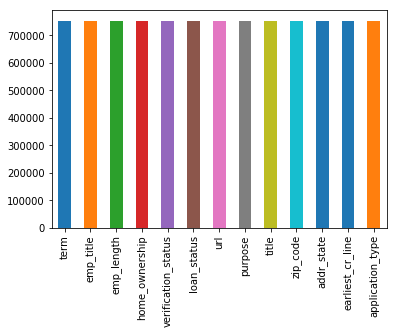

In [12]:
print (data.describe())
plt.figure()
objects = list(data.select_dtypes(include=['object']).columns)
data[objects].count().plot.bar()

### Selecting 13 features to use in this initial approach

In [13]:
features = ['emp_length',                # number of years of employment
            'home_ownership',            # home_ownership status: own, mortgage or rent
            'dti',                       # debt to income ratio
            'purpose',                   # the purpose of the loan
            'term',                      # the term of the loan
            'loan_amnt',                 # loan amount
            'annual_inc',                # annual income           
            'total_acc',                 # num accounts
            'delinq_2yrs',               # num past delinquencies
            'pub_rec',                   # num public records
            'inq_last_6mths',            # num inquiries past 6 months
            'collections_12_mths_ex_med',# num collections that are not medical in the last year
            'acc_now_delinq',            # num accounts on which is now delinquent         
           ]           

### Finding labels

In [14]:
data.loan_status.value_counts()

Current               554664
Fully Paid            146533
Charged Off            32184
Late (31-120 days)     10562
In Grace Period         5714
Late (16-30 days)       2128
Default                 1113
Issued                    40
Name: loan_status, dtype: int64

In [15]:
status = ['Default', 'Late (31-120 days)', 'Fully Paid', 'Charged Off']
data = data.loc[data.loan_status.isin(status)]

In [16]:
data['label'] = data['loan_status'].apply(lambda x : +1 if x=='Fully Paid' else -1)
default = data.loc[data['label'] == -1]
paid = data.loc[data['label'] == 1]
print ("Paid loans: %d, risky: %d" % (len(paid), len(default)))
print ("Percentage of safe loans  : %s " % (len(paid)* 100.0 / (len(default) + len(paid))))
print ("Percentage of risky loans : %s " % (len(default)* 100.0 / (len(default) + len(paid))))

Paid loans: 146533, risky: 43859
Percentage of safe loans  : 76.96384301861423 
Percentage of risky loans : 23.036156981385773 


### Creating  datasets

In [17]:
dataset_x = default[features].append(paid[features])
dataset_y = default.label.append(paid.label)

### Encoding features

In [18]:
from sklearn import preprocessing

dataset_x.emp_length = dataset_x.emp_length.apply(lambda x: x[:-6] if 'years' in x else '0')
dataset_x.emp_length = dataset_x.emp_length.apply(lambda x: float(x[:-1]) if '+' in x else float(x))
dataset_x.term = dataset_x.term.apply(lambda x: float(x.replace("months","")))

print ("Number of total data points: %d, labels:%d" % (len(dataset_x), len(dataset_y)))

Number of total data points: 190392, labels:190392


In [19]:
home_own = pd.get_dummies(dataset_x.home_ownership, prefix='p')
dataset_x[home_own.columns] =  home_own

purpose = pd.get_dummies(dataset_x.purpose, prefix='p')
dataset_x[purpose.columns] =  purpose

del dataset_x['purpose']
del dataset_x['home_ownership']
print (dataset_x.head(10))

       emp_length    dti  term  loan_amnt  annual_inc  total_acc  delinq_2yrs  \
42550         2.0  15.75  36.0     8000.0     33000.0       16.0          0.0   
42563         5.0  27.03  60.0    10000.0     25000.0       22.0          0.0   
42593         3.0   3.68  36.0    15000.0     60000.0       12.0          0.0   
42619        10.0   8.58  60.0    28000.0    124000.0       40.0          0.0   
42620         0.0  27.98  36.0    13225.0     30192.0       21.0          0.0   
42631         0.0  30.02  60.0    23675.0     54000.0       33.0          0.0   
42644        10.0   4.51  60.0    12000.0     55000.0       20.0          0.0   
42655         5.0  19.69  60.0    19425.0     55000.0       26.0          0.0   
42667         8.0  20.35  60.0    16000.0    105000.0       38.0          1.0   
42676        10.0  13.70  60.0    10600.0     60000.0       20.0          0.0   

       pub_rec  inq_last_6mths  collections_12_mths_ex_med    ...      \
42550      1.0             1.0     

### Model training + cross-validation

In [36]:
print ("Dataset shape: ",dataset_x.shape)

Dataset shape:  (190392, 30)


In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import cross_validate, train_test_split

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(dataset_x, dataset_y, test_size=0.2, random_state=1)


clf = RandomForestClassifier(n_estimators=500, n_jobs = 2)
scoring = {'accuracy': make_scorer(accuracy_score),'prec': 'precision'}
cv_results = cross_validate(clf, X_train, y_train, scoring=scoring)


In [41]:
for s, r in cv_results.items():
    print (s, r)

neg = y_train[y_train == -1].count()
pos = y_train[y_train == 1].count()
print ("Percentage of default in training set: ", (neg*100/pos))

neg2 = y_test[y_test == -1].count()
pos2 = y_test[y_test == 1].count()
print ("Percentage of default in testing set: ", (neg2*100/pos2))

fit_time [98.4161346  87.13341141 91.61245775]
score_time [22.81344509 18.08664727 19.0295229 ]
test_accuracy [0.76699297 0.76902169 0.76833232]
train_accuracy [1. 1. 1.]
test_prec [0.78008665 0.78169362 0.78120052]
train_prec [1. 1. 1.]
Percentage of default in training set:  29.812584694842883
Percentage of default in testing set:  30.40753424657534


### ROC curve and AUC

In [43]:
# Receiver operating characteristic 
# TPR = true positive rate vs. FPR = false positive rate, at various threshold settings
# Here FPR is better -> specificity = 1 - FPR 

from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import classification_report, roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()

for i, n_estimators in enumerate([100, 300, 500, 1000, 2000]):
    clf = RandomForestClassifier(n_estimators, n_jobs=2)
    clf.fit(X_train, y_train)
    y_predict = clf.predict_proba(X_test)
    y_predict_class = clf.predict(X_test)
    fpr[i], tpr[i], _ = roc_curve(y_test, y_predict[:,1], pos_label=1)
    print ("Accuracy score for %d estimators: %f" % (n_estimators, accuracy_score(y_test, y_predict_class)))
    roc_auc[i] = auc(fpr[i], tpr[i])
    
print (roc_auc)

Accuracy score for 100 estimators: 0.763649
Accuracy score for 300 estimators: 0.764857
Accuracy score for 500 estimators: 0.765619
Accuracy score for 1000 estimators: 0.765514
Accuracy score for 2000 estimators: 0.765829
{0: 0.6498855484003352, 1: 0.6531125678258843, 2: 0.6527542978892785, 3: 0.6543545394165393, 4: 0.6548650328541872}


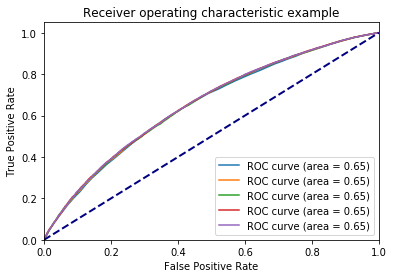

In [44]:
import matplotlib.pyplot as plt
plt.figure()

lw = 2 #line width
for i, f in enumerate(fpr):
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### Improving Performance

Using the data uptil the **Model training + cross validation** section, we further build on dataset_x to include more interesting features. One thing that can be definitely done is *normalization*. The intuition is that loan amount, for instance, doesn't by itself mean as much as, say, normalized by the annual income. A 1 million dollar loan for a man earning 10 million a year isn't that much! Thus, in this spirit, I propose two new features:
- loan_amnt / annual_inc
- acc_now_delinq / total_acc

I then check the performance of the random forest classifier using the same code as above

In [20]:
dataset_x['loan_amt_per_unit_inc'] = dataset_x['loan_amnt'] / dataset_x['annual_inc']
dataset_x['delinq_per_unit_total_acc'] = dataset_x['acc_now_delinq'] / dataset_x['total_acc']

from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import cross_validate, train_test_split

In [20]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(dataset_x, dataset_y, test_size=0.2, random_state=1)


clf = RandomForestClassifier(n_estimators=500, n_jobs = 2)
scoring = {'accuracy': make_scorer(accuracy_score),'prec': 'precision'}
cv_results = cross_validate(clf, X_train, y_train, scoring=scoring)

# Results

for s, r in cv_results.items():
    print (s, r)

neg = y_train[y_train == -1].count()
pos = y_train[y_train == 1].count()
print ("Percentage of default in training set: ", (neg*100/pos))

neg2 = y_test[y_test == -1].count()
pos2 = y_test[y_test == 1].count()
print ("Percentage of default in testing set: ", (neg2*100/pos2))

fit_time [72.73478627 66.73056221 63.4707129 ]
score_time [11.96477985 10.56934142 11.28712559]
test_accuracy [0.76752477 0.7694944  0.76929743]
train_accuracy [1. 1. 1.]
test_prec [0.78036961 0.78174342 0.78166379]
train_prec [1. 1. 1.]
Percentage of default in training set:  29.812584694842883
Percentage of default in testing set:  30.40753424657534


As we can see, both the accuracy and precision on the test set are slightly better (~0.05% & ~0.04% respectively) than without our new variables.
### Scaling

Since we are using a Random Forest classifier, scaling typically doesn't add any value. In fact univariate scaling [might end up masking complex nonlinear relationships b/w variables](https://stackoverflow.com/a/8962851/5908050) that could be exploited by RF. That said, we are scaling/normalizing the data to create features that can be more comparable across rows, like loan amount per unit annual income!

### Hyper-parameter tuning

For the RF classifier, we can try tuning the n_estimators (number of trees in forest), max_depth and max_features (Number of possible factors to choose from to split at each node) among others. For the interest of time and mindful of computational capacity, we consider just the the first two.

We see that our model seems like it might be overfitting (train accuracy and precision of 100%) and thus, we can introduce the max_depth to improve OOS performance.

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import classification_report, roc_curve, auc

fpr = []
tpr = []
roc_auc = []

for n_estimators in [100, 300, 500]:
    for depth in [3, 7, 10]:
        clf = RandomForestClassifier(n_estimators, max_depth = depth, n_jobs=2)
        clf.fit(X_train, y_train)
        y_predict = clf.predict_proba(X_test)
        y_predict_class = clf.predict(X_test)
        fpr_temp, tpr_temp, _ = roc_curve(y_test, y_predict[:,1], pos_label=1)
        fpr.append(fpr_temp)
        tpr.append(tpr_temp)
        roc_auc.append(auc(fpr_temp, tpr_temp))
        print ("Accuracy score for %d estimators with max tree depth of %d: %f"
               % (n_estimators, depth, accuracy_score(y_test, y_predict_class)))

print (roc_auc)

Accuracy score for 100 estimators with max tree depth of 3: 0.766827
Accuracy score for 100 estimators with max tree depth of 7: 0.767378
Accuracy score for 100 estimators with max tree depth of 10: 0.768613
Accuracy score for 300 estimators with max tree depth of 3: 0.766827
Accuracy score for 300 estimators with max tree depth of 7: 0.767247
Accuracy score for 300 estimators with max tree depth of 10: 0.768403
Accuracy score for 500 estimators with max tree depth of 3: 0.766827
Accuracy score for 500 estimators with max tree depth of 7: 0.767037
Accuracy score for 500 estimators with max tree depth of 10: 0.768639
[0.6605496692981901, 0.6679262674588493, 0.6716665323134317, 0.6610425245345721, 0.6678912031930042, 0.6722934521504489, 0.6604360488886352, 0.6681429207287628, 0.6720993162256024]


The benefits here are obvious. Restricting tree growth has prevented overfitting to some extent and given an ~0.3% boost to accuracy for 500 estimators with a max_depth of 10.

I now move on to trying out other classifiers, namely SVM and Gradient Boosting. The reason I choose the latter is past experience with its outperformance of several other non-deep learning classifiers. I have also run Gradient Boosting on a similar credit classification problem [earlier](https://github.com/prateek1592/SirSomeCreditPlz) and found it to be outperform others. Gradient Boosting typically also works well for imbalanced datasets since it basically penalizes errors by class depending on how error is evolving as new trees are constructed.

Note that Linear SVM is used here since the SVM was not executing at all due probably to computational power constraints.

### Linear SVM

In [21]:
from sklearn.svm import LinearSVC
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(dataset_x, dataset_y, test_size=0.2, random_state=1)

clf = LinearSVC()
scoring = {'accuracy': make_scorer(accuracy_score),'prec': 'precision'}
cv_results = cross_validate(clf, X_train, y_train, scoring=scoring)

# Results

for s, r in cv_results.items():
    print (s, r)

fit_time [33.28962016 38.60568094 36.79577446]
score_time [0.03924012 0.06497645 0.05307293]
test_accuracy [0.77034134 0.77034134 0.76797778]
train_accuracy [0.77034134 0.77034134 0.76819444]
test_prec [0.77034134 0.77034134 0.77110322]
train_prec [0.77034134 0.77034134 0.7709758 ]


### Gradient Boosting

In [22]:
from sklearn.ensemble import GradientBoostingClassifier

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(dataset_x, dataset_y, test_size=0.2, random_state=1)

clf = GradientBoostingClassifier(n_estimators=100)
scoring = {'accuracy': make_scorer(accuracy_score),'prec': 'precision'}
cv_results = cross_validate(clf, X_train, y_train, scoring=scoring)

# Results

for s, r in cv_results.items():
    print (s, r)

fit_time [16.26808643 18.7364068  15.66963649]
score_time [0.36311078 0.25993967 0.24949026]
test_accuracy [0.77250793 0.77227157 0.77343365]
train_accuracy [0.77496996 0.77449725 0.77421166]
test_prec [0.77829836 0.77892072 0.77911679]
train_prec [0.77988273 0.78004211 0.7794568 ]


Note that Linear SVM and Gradient Boosting both outperform Random forests on test accuracy. This is despite them not being hyper-parameter tuned; thus, our results can only improve. Also, the best test accuracy among our 3 chosen classifiers comes from **Gradient Boosting**. The rationale was explained in the previous few cells.